In [1]:
import geopandas as gpd
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib as plt
import osmnx as ox
import fiona as fn
%matplotlib inline
ox.config(log_file=True, log_console=True, use_cache=True)

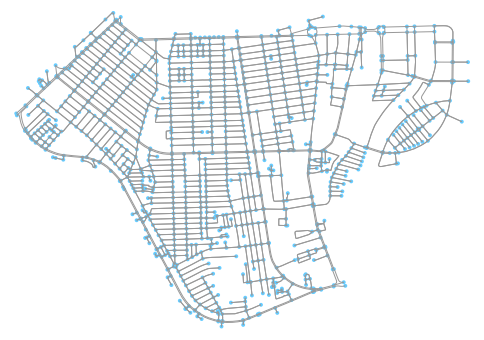

In [2]:
G = ox.graph_from_place('Khan Chamkar Mon, Cambodia', network_type='drive', buffer_dist=100)
fig, ax = ox.plot_graph(ox.project_graph(G))
graph_proj = ox.project_graph(G)
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

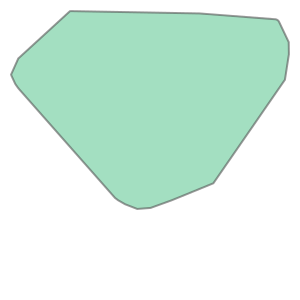

In [3]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull
# Show output
convex_hull

In [26]:
# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj, ecc=True, bc=True, cc=True)
for key, value in extended_stats.items():
    stats[key] = value
pd.Series(stats)

n                                                                                   1071
m                                                                                   2872
k_avg                                                                            5.36321
intersection_count                                                                   955
streets_per_node_avg                                                             3.12418
streets_per_node_counts                       {0: 0, 1: 116, 2: 0, 3: 593, 4: 359, 5: 3}
streets_per_node_proportion            {0: 0.0, 1: 0.10830999066293184, 2: 0.0, 3: 0....
edge_length_total                                                                 311364
edge_length_avg                                                                  108.414
street_length_total                                                               179184
street_length_avg                                                                109.861
street_segments_count

In [27]:
G_projected = ox.project_graph(G)
max_node, max_bc = max(extended_stats['betweenness_centrality'].items(), key=lambda x: x[1])
max_node, max_bc

(6100191544, 0.18805798810647328)

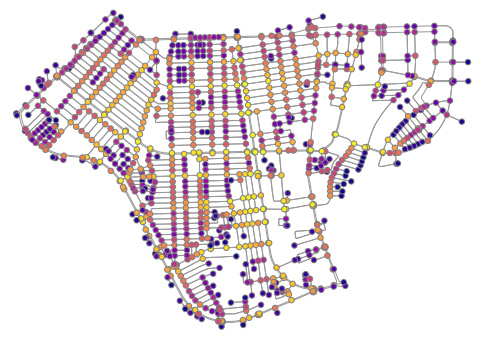

In [30]:
# get a color for each node
def get_color_list(n, color_map='plasma', start=0, end=1):
    return [cm.get_cmap(color_map)(x) for x in np.linspace(start, end, n)]

def get_node_colors_by_stat(G, data, start=0, end=1):
    df = pd.DataFrame(data=pd.Series(data).sort_values(), columns=['value'])
    df['colors'] = get_color_list(len(df), start=start, end=end)
    df = df.reindex(G.nodes())
    return df['colors'].tolist()

nc = get_node_colors_by_stat(G_projected, data=extended_stats['betweenness_centrality'])
fig, ax = ox.plot_graph(G_projected, node_color=nc, node_edgecolor='gray', node_size=30, node_zorder=2)

In [9]:
# node closeness centrality
node_centrality = nx.closeness_centrality(G)

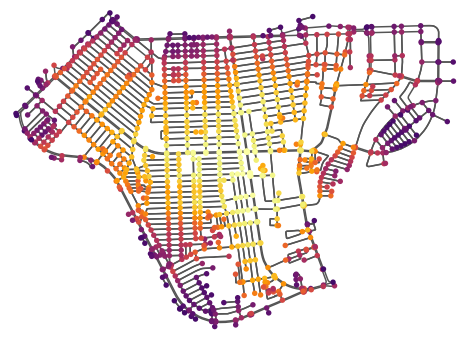

In [10]:
# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='w', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

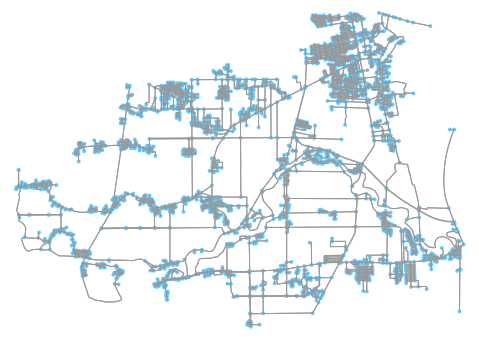

In [60]:
# you can also create a network with a buffer distance (meters) around the place
G = ox.graph_from_place('Khan Dangkao, Cambodia', network_type='drive', buffer_dist=100)
fig, ax = ox.plot_graph(ox.project_graph(G))
graph_proj = ox.project_graph(G)
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)


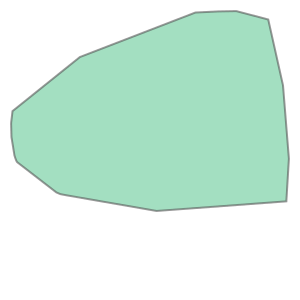

In [61]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull
# Show output
convex_hull

In [62]:
# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj, ecc=True, bc=True, cc=True)
for key, value in extended_stats.items():
    stats[key] = value
pd.Series(stats)

n                                                                                   3833
m                                                                                   9706
k_avg                                                                            5.06444
intersection_count                                                                  2760
streets_per_node_avg                                                             2.59457
streets_per_node_counts                     {0: 0, 1: 1073, 2: 0, 3: 2169, 4: 590, 5: 1}
streets_per_node_proportion            {0: 0.0, 1: 0.27993738585963995, 2: 0.0, 3: 0....
edge_length_total                                                            1.06299e+06
edge_length_avg                                                                  109.519
street_length_total                                                               550891
street_length_avg                                                                111.788
street_segments_count

In [63]:
G_projected = ox.project_graph(G)
max_node, max_bc = max(extended_stats['betweenness_centrality'].items(), key=lambda x: x[1])
max_node, max_bc

(4175997612, 0.4017062280497485)

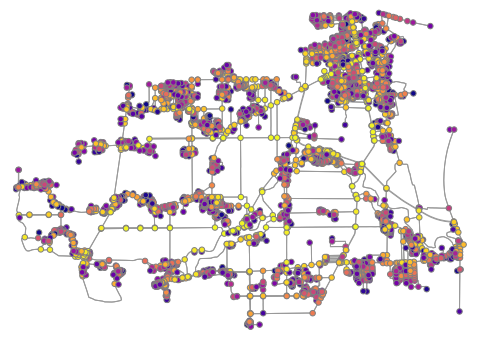

In [65]:
# get a color for each node
def get_color_list(n, color_map='plasma', start=0, end=1):
    return [cm.get_cmap(color_map)(x) for x in np.linspace(start, end, n)]

def get_node_colors_by_stat(G, data, start=0, end=1):
    df = pd.DataFrame(data=pd.Series(data).sort_values(), columns=['value'])
    df['colors'] = get_color_list(len(df), start=start, end=end)
    df = df.reindex(G.nodes())
    return df['colors'].tolist()

nc = get_node_colors_by_stat(G_projected, data=extended_stats['betweenness_centrality'])
fig, ax = ox.plot_graph(G_projected, node_color=nc, node_edgecolor='gray', node_size=30, node_zorder=2)

In [16]:
# node closeness centrality
node_centrality = nx.closeness_centrality(G)

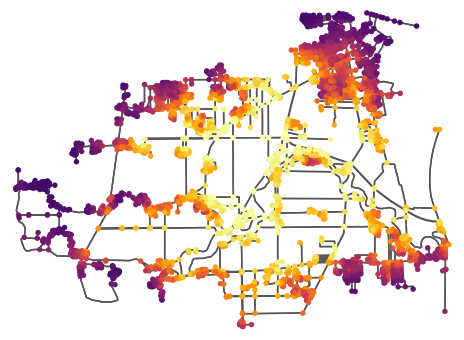

In [19]:
# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='w', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

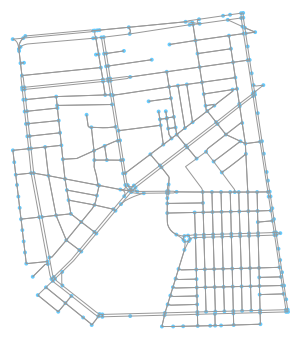

In [35]:
G = ox.graph_from_place('Khan Prampi Makara, Cambodia', network_type='drive', buffer_dist=100)
fig, ax = ox.plot_graph(ox.project_graph(G))
graph_proj = ox.project_graph(G)
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

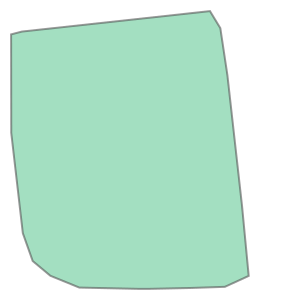

In [36]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull
# Show output
convex_hull

In [37]:
# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj, ecc=True, bc=True, cc=True)
for key, value in extended_stats.items():
    stats[key] = value
pd.Series(stats)

n                                                                                    356
m                                                                                    880
k_avg                                                                            4.94382
intersection_count                                                                   347
streets_per_node_avg                                                             3.37079
streets_per_node_counts                   {0: 0, 1: 9, 2: 3, 3: 195, 4: 146, 5: 2, 6: 1}
streets_per_node_proportion            {0: 0.0, 1: 0.025280898876404494, 2: 0.0084269...
edge_length_total                                                                77829.1
edge_length_avg                                                                  88.4422
street_length_total                                                              49586.3
street_length_avg                                                                88.0751
street_segments_count

In [38]:
G_projected = ox.project_graph(G)
max_node, max_bc = max(extended_stats['betweenness_centrality'].items(), key=lambda x: x[1])
max_node, max_bc

(4115032233, 0.1562895458421556)

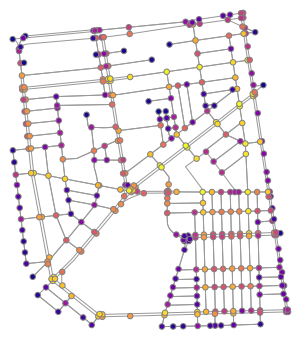

In [40]:
# get a color for each node
def get_color_list(n, color_map='plasma', start=0, end=1):
    return [cm.get_cmap(color_map)(x) for x in np.linspace(start, end, n)]

def get_node_colors_by_stat(G, data, start=0, end=1):
    df = pd.DataFrame(data=pd.Series(data).sort_values(), columns=['value'])
    df['colors'] = get_color_list(len(df), start=start, end=end)
    df = df.reindex(G.nodes())
    return df['colors'].tolist()

nc = get_node_colors_by_stat(G_projected, data=extended_stats['betweenness_centrality'])
fig, ax = ox.plot_graph(G_projected, node_color=nc, node_edgecolor='gray', node_size=30, node_zorder=2)

In [41]:
# node closeness centrality
node_centrality = nx.closeness_centrality(G)

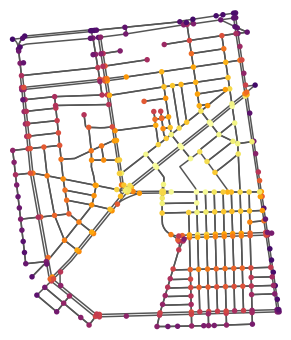

In [42]:
# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='w', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

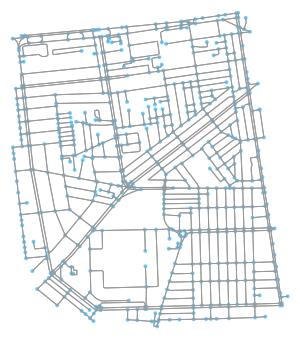

In [52]:
G = ox.graph_from_place('Khan Prampi Makara, Cambodia', network_type='walk', buffer_dist=100)
fig, ax = ox.plot_graph(ox.project_graph(G))
graph_proj = ox.project_graph(G)
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

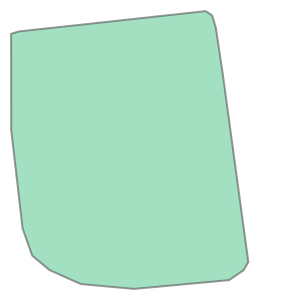

In [53]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull
# Show output
convex_hull

In [54]:
# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj, ecc=True, bc=True, cc=True)
for key, value in extended_stats.items():
    stats[key] = value
pd.Series(stats)

n                                                                                    631
m                                                                                   1868
k_avg                                                                            5.92076
intersection_count                                                                   572
streets_per_node_avg                                                             3.10935
streets_per_node_counts                  {0: 0, 1: 59, 2: 0, 3: 389, 4: 180, 5: 2, 6: 1}
streets_per_node_proportion            {0: 0.0, 1: 0.09350237717908082, 2: 0.0, 3: 0....
edge_length_total                                                                 134696
edge_length_avg                                                                  72.1072
street_length_total                                                              67758.9
street_length_avg                                                                72.4694
street_segments_count

In [55]:
G_projected = ox.project_graph(G)
max_node, max_bc = max(extended_stats['betweenness_centrality'].items(), key=lambda x: x[1])
max_node, max_bc

(4115032239, 0.1454320367647162)

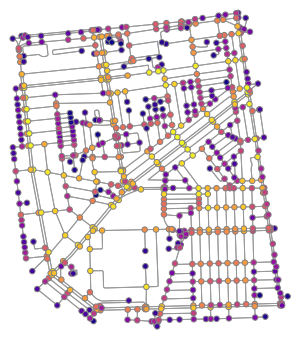

In [57]:
# get a color for each node
def get_color_list(n, color_map='plasma', start=0, end=1):
    return [cm.get_cmap(color_map)(x) for x in np.linspace(start, end, n)]

def get_node_colors_by_stat(G, data, start=0, end=1):
    df = pd.DataFrame(data=pd.Series(data).sort_values(), columns=['value'])
    df['colors'] = get_color_list(len(df), start=start, end=end)
    df = df.reindex(G.nodes())
    return df['colors'].tolist()

nc = get_node_colors_by_stat(G_projected, data=extended_stats['betweenness_centrality'])
fig, ax = ox.plot_graph(G_projected, node_color=nc, node_edgecolor='gray', node_size=30, node_zorder=2)

In [58]:
# node closeness centrality
node_centrality = nx.closeness_centrality(G)

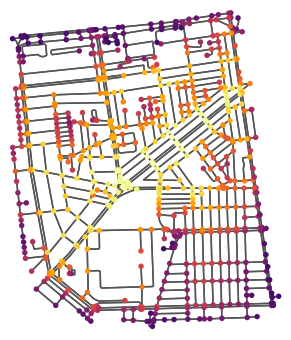

In [59]:
# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='w', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

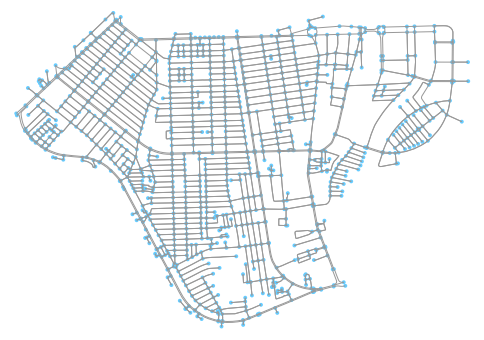

In [4]:
G = ox.graph_from_place('Khan Chamkar Mon, Cambodia', network_type='drive', buffer_dist=100)
fig, ax = ox.plot_graph(ox.project_graph(G))
graph_proj = ox.project_graph(G)
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

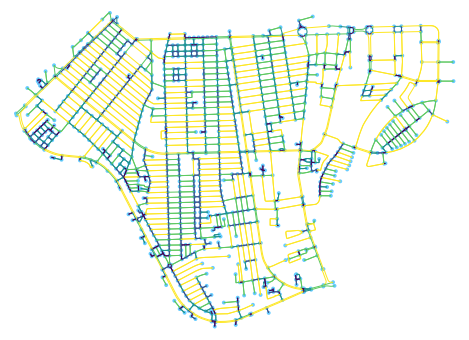

(<Figure size 615.162x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26137501e10>)

In [6]:
ec = ox.get_edge_colors_by_attr(G, attr='length')
ox.plot_graph(G, edge_color=ec)